In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
import statsmodels.api as sm

In [4]:
df=pd.read_excel(r"C:\Users\sanga\Python_coding\Simplilear data\Machine_Learning\Project\Health_Care\1645792390_cep1_dataset.xlsx")

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
## Row 164 is duplicated so we can drop
df[df.duplicated()==True] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(302, 14)

## Exploratory Data Analysis

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

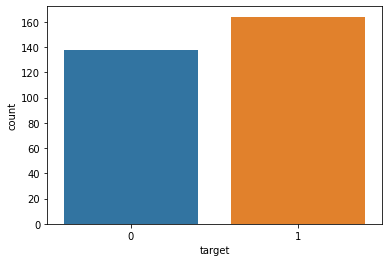

In [14]:
sns.countplot(df['target'])

<AxesSubplot:xlabel='age', ylabel='Count'>

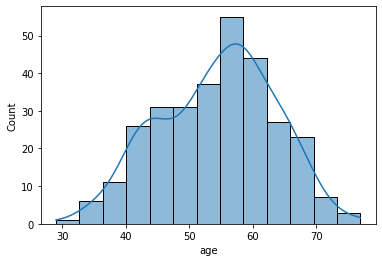

In [15]:
sns.histplot(df['age'],kde=True)

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

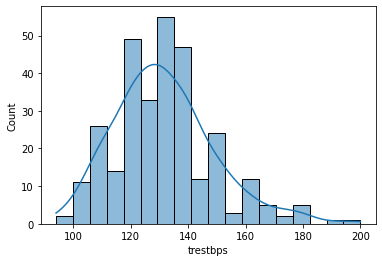

In [16]:
sns.histplot(df['trestbps'],kde=True)

<AxesSubplot:xlabel='chol', ylabel='Count'>

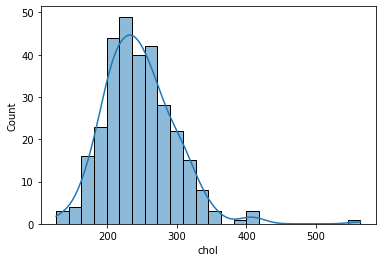

In [17]:
sns.histplot(df['chol'],kde=True)

<AxesSubplot:xlabel='thalach', ylabel='Count'>

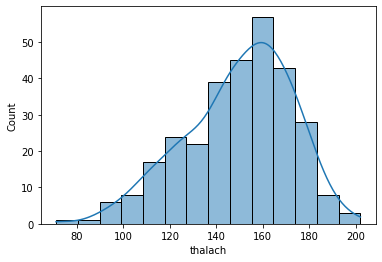

In [18]:
sns.histplot(df['thalach'],kde=True)

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

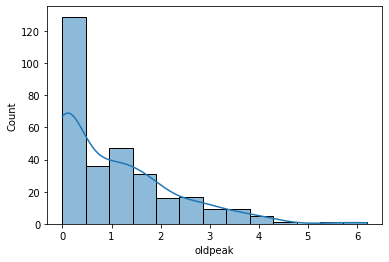

In [19]:
sns.histplot(df['oldpeak'],kde=True)

### Identifying Categorical varable

In [20]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [21]:
cat_var=[]
for i in df.columns:
    if df[i].nunique()<=5:
        cat_var.append(i)

In [22]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [23]:
df_cat=df[cat_var]

In [24]:
df_cat.head(2)

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1


In [25]:
df_num=df.drop(cat_var,axis=1)

In [26]:
df_num.head(2)

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5


### Exploring Categorical Variable with Respect to Target

In [27]:
cat_var

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

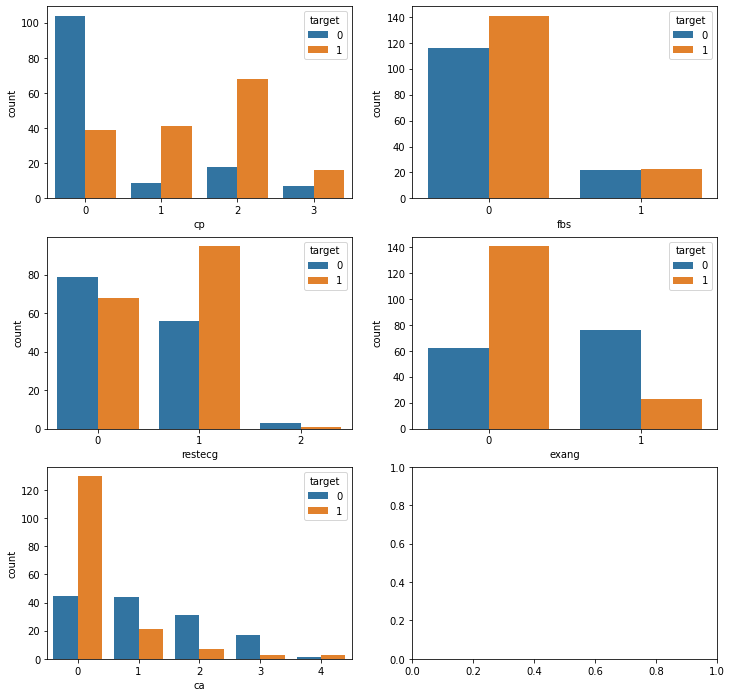

In [28]:
fig,ax=plt.subplots(3,2,figsize=(12,12))

sns.countplot(x='cp',hue='target',data=df,ax=ax[0,0])
sns.countplot(x='fbs',hue='target',data=df,ax=ax[0,1])
sns.countplot(x='restecg',hue='target',data=df,ax=ax[1,0])
sns.countplot(x='exang',hue='target',data=df,ax=ax[1,1])
sns.countplot(x='ca',hue='target',data=df,ax=ax[2,0])
fig.show()

##### Chest pain(cp) type 1,2,3 are most dangerous 
##### Fasting Blood Sugar(fbs) does not impact much
##### Resting Electrocardiograph of value 1 showing signs of heart problems
##### Excercise Induce Angina(exang) value 0 showing no exercise are more vulnerable to Heart Attack
##### Number of blood vessel(ca) with 0 values shows higher attack as decrease/no blood sypply


### Ocurrence of CVD acros Age Category

<AxesSubplot:xlabel='age', ylabel='Count'>

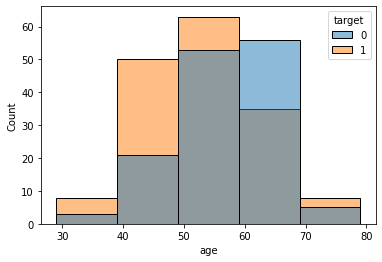

In [29]:
sns.histplot(x='age',hue='target',data=df,binwidth=10)

##### Age Above 40 has higher chances of getting affected by CVD

### Composition of all patients with respect to the Sex category

In [30]:
df.groupby(['sex'])['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

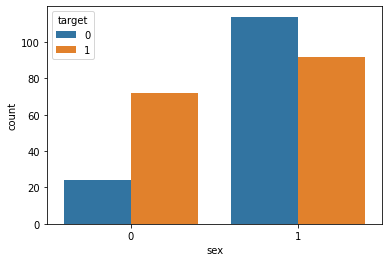

In [31]:
sns.countplot(x='sex',hue='target',data=df)

##### Female has higher percentage of occurrence in their category

### Detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient


<AxesSubplot:xlabel='trestbps', ylabel='Count'>

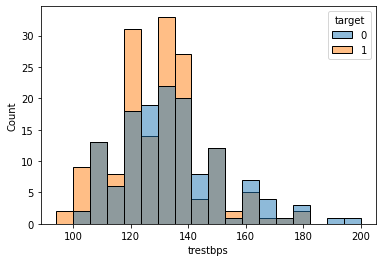

In [32]:
sns.histplot(x='trestbps',hue='target',data=df)

###### Resting Blood Pressure above 120 have higher chance of getting attack

### Relation between Chlestrol and Target Variable

In [33]:
correlation_matrix=df.corr()

In [34]:
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [35]:
## Corelation with respect to target
correlation_matrix['target']

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<AxesSubplot:>

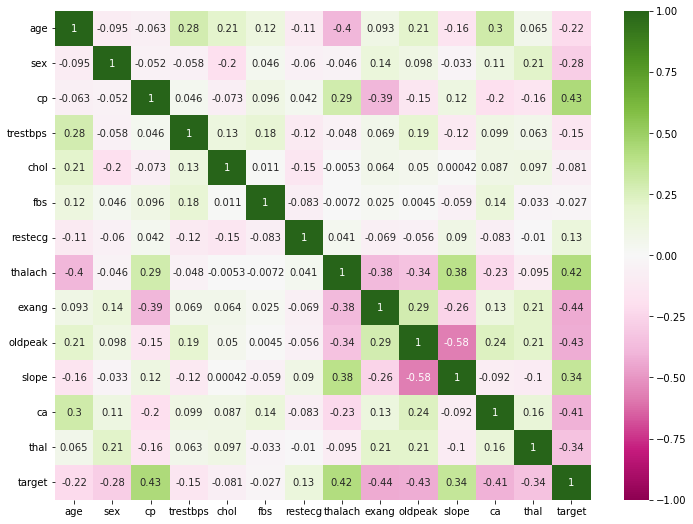

In [36]:
## Plotting Correlation Matrix 
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0,cmap='PiYG')

<AxesSubplot:xlabel='chol', ylabel='Count'>

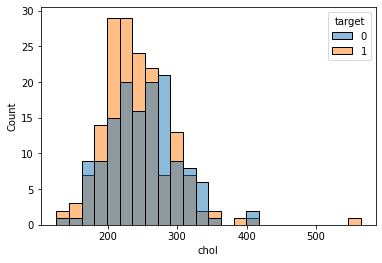

In [37]:
sns.histplot(x='chol',hue='target',data=df)

##### Cholestrol Above 200 level seems to have higher effect on heart attack

### Relationship exists between peak exercising and the occurrence of a heart attack

In [38]:
df['slope'].value_counts()

2    141
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

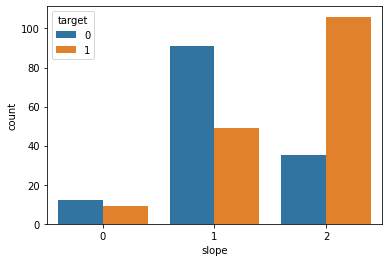

In [39]:
sns.countplot(x='slope',hue='target',data=df)

##### Slope of level 2 is more critical

### ⦁	Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal', ylabel='count'>

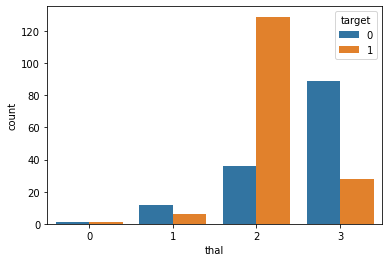

In [40]:
sns.countplot(x='thal',hue='target',data=df)

##### value of 2 is concern, also from corrlation matirx it has good relation

### Other factors determine the occurrence of CVD

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

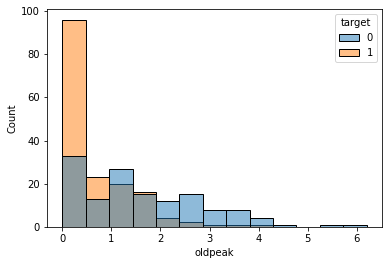

In [41]:
sns.histplot(x='oldpeak',hue='target',data=df)

###### ST Depression induce by excercise of value 0 have more heart problems

### Pairplot

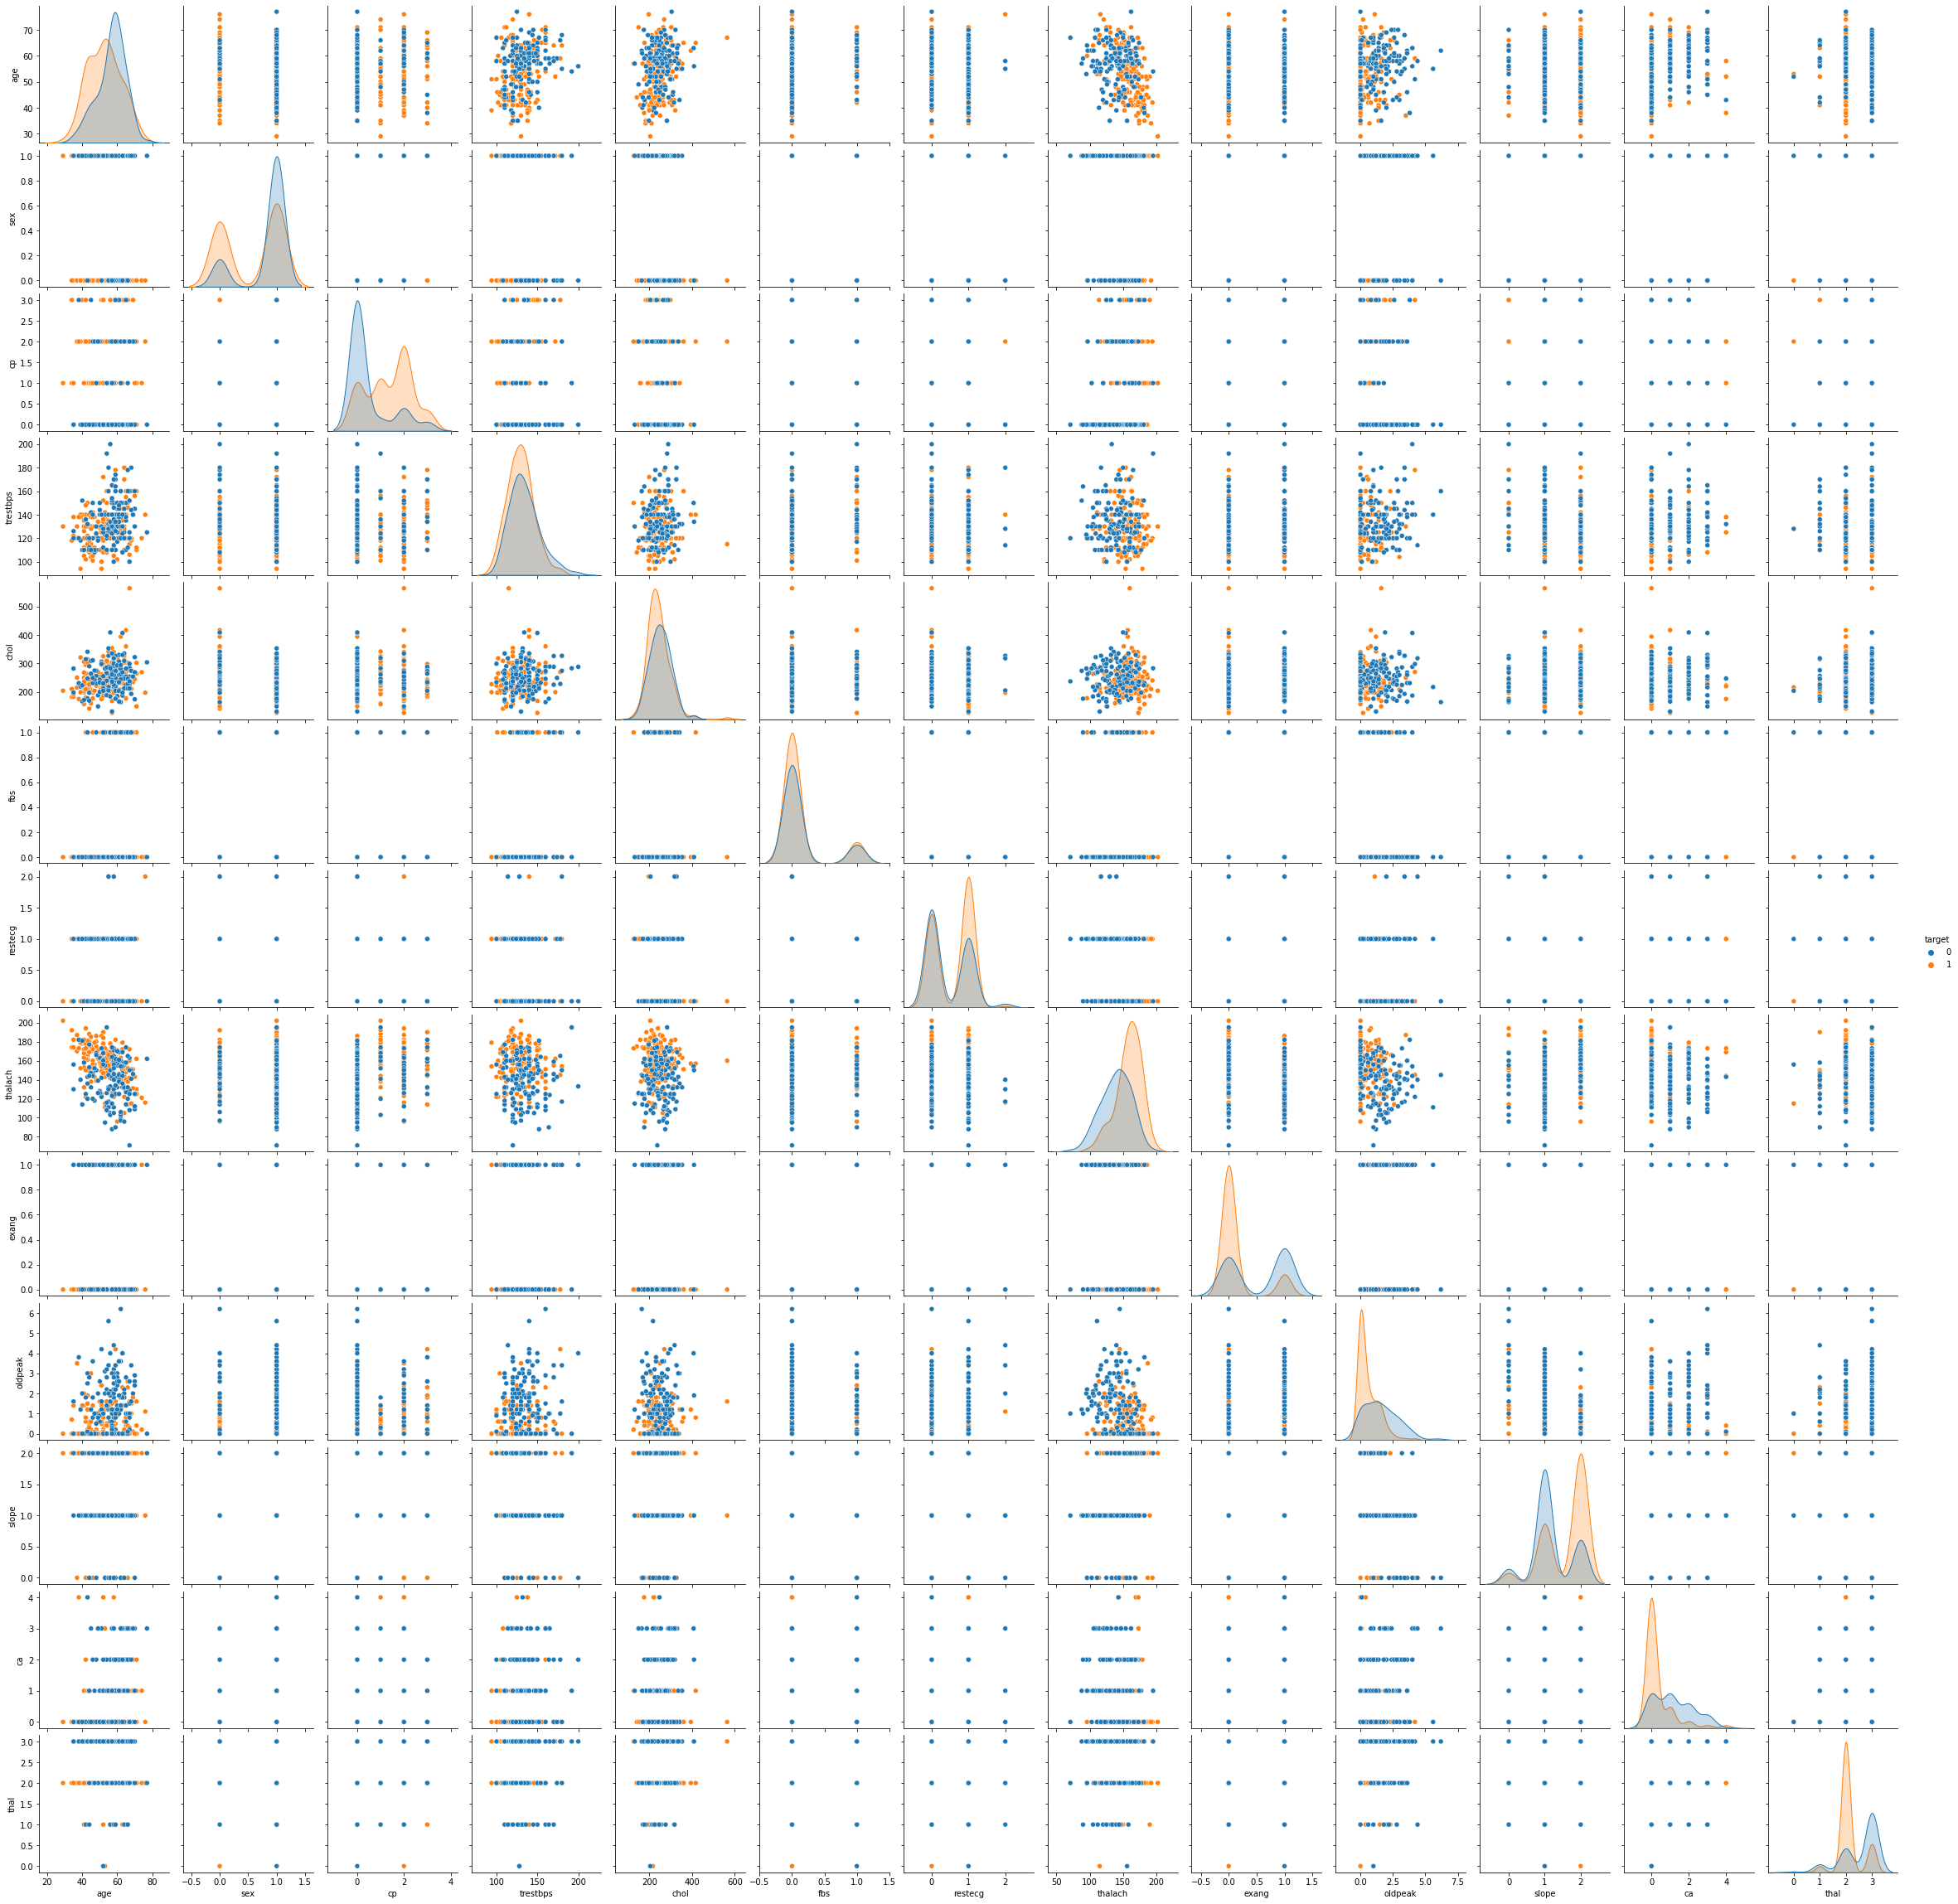

In [42]:
sns.pairplot(df,hue='target')

## Model Building

In [43]:
df_cat=df_cat.drop('target',axis=1)

In [44]:
df_cat_dummy=pd.get_dummies(df_cat,columns=df_cat.columns)

In [45]:
df_cat_dummy.head(2)

,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [46]:
df_cat_dummy.shape

(302, 25)

In [47]:
df_num.shape

(302, 5)

In [48]:
df_final=pd.concat([df_num,df_cat_dummy],axis=1)

In [49]:
df_final.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
df_final.shape

(302, 30)

In [51]:
x=df_final
y=df['target']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lg=LogisticRegression()

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=12)

In [56]:
lg.fit(x_train,y_train)

LogisticRegression()

In [57]:
pred_lg=lg.predict(x_test)

In [58]:
accuracy_score(y_test,pred_lg)

0.8552631578947368

In [60]:
accuracy_score(y_train,lg.predict(x_train))

0.8584070796460177

In [61]:
confusion_matrix(y_test,pred_lg)

array([[34,  3],
       [ 8, 31]], dtype=int64)

In [62]:
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        37
           1       0.91      0.79      0.85        39

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.85        76



### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier()

In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
pred_rf=rf.predict(x_test)

In [67]:
accuracy_score(y_test,pred_rf)

0.8552631578947368

In [68]:
accuracy_score(y_train,rf.predict(x_train))

1.0

In [69]:
confusion_matrix(y_test,pred_rf)

array([[33,  4],
       [ 7, 32]], dtype=int64)

In [70]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.89      0.82      0.85        39

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



In [71]:
dict(zip(x.columns,rf.feature_importances_.round(3)))

{'age': 0.081,
 'trestbps': 0.071,
 'chol': 0.068,
 'thalach': 0.112,
 'oldpeak': 0.113,
 'sex_0': 0.019,
 'sex_1': 0.026,
 'cp_0': 0.055,
 'cp_1': 0.009,
 'cp_2': 0.023,
 'cp_3': 0.014,
 'fbs_0': 0.01,
 'fbs_1': 0.008,
 'restecg_0': 0.016,
 'restecg_1': 0.015,
 'restecg_2': 0.0,
 'exang_0': 0.031,
 'exang_1': 0.03,
 'slope_0': 0.004,
 'slope_1': 0.017,
 'slope_2': 0.022,
 'ca_0': 0.077,
 'ca_1': 0.017,
 'ca_2': 0.016,
 'ca_3': 0.008,
 'ca_4': 0.003,
 'thal_0': 0.002,
 'thal_1': 0.006,
 'thal_2': 0.073,
 'thal_3': 0.055}

### Feature Selection

In [72]:
from sklearn.feature_selection import RFE

In [73]:
rfe=RFE(estimator=lg,step=1)

In [74]:
rf_fit=rfe.fit(x_train,y_train)

In [75]:
rf_fit_df=pd.DataFrame({'Feature':list(x_train.columns),'Ranking':rf_fit.ranking_})

In [76]:
rf_fit_df.sort_values('Ranking')

,Feature,Ranking
14,restecg_1,1
25,ca_4,1
24,ca_3,1
23,ca_2,1
22,ca_1,1
21,ca_0,1
19,slope_1,1
28,thal_2,1
10,cp_3,1
29,thal_3,1


In [77]:
## Creating Matrix for important feature, ranked 1 are most important
x_train_rfe=rf_fit.transform(x_train)
x_test_rfe=rf_fit.transform(x_test)

In [78]:
# 15 features are selected
x_train_rfe[0:3]

array([[0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
        0. , 1. ],
       [0.8, 1. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ,
        1. , 0. ],
       [1.4, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ,
        0. , 1. ]])

In [79]:
rfe.fit(x_train_rfe,y_train)

RFE(estimator=LogisticRegression())

In [80]:
accuracy_score(y_test,rfe.predict(x_test_rfe))

0.8421052631578947

In [81]:
accuracy_score(y_train,rfe.predict(x_train_rfe))

0.8628318584070797

In [82]:
confusion_matrix(y_test,rfe.predict(x_test_rfe))

array([[33,  4],
       [ 8, 31]], dtype=int64)

## Predicting Using other Algorithms

### Support Vector Machine

In [83]:
from sklearn.svm import SVC

In [84]:
svc=SVC()

In [85]:
svc.fit(x_train,y_train)

SVC()

In [86]:
pred_svc=svc.predict(x_test)

In [87]:
accuracy_score(y_test,pred_svc)

0.6447368421052632

In [88]:
accuracy_score(y_train,svc.predict(x_train))

0.6592920353982301

### ADA Boosting

In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [90]:
adb=AdaBoostClassifier()

In [91]:
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [92]:
pred_adb=adb.predict(x_test)

In [93]:
accuracy_score(y_test,pred_adb)

0.7894736842105263

In [94]:
accuracy_score(y_train,adb.predict(x_train))

0.9336283185840708

### Gradient Boost

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gb=GradientBoostingClassifier()

In [97]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [98]:
pred_gb=gb.predict(x_test)

In [99]:
accuracy_score(y_test,pred_gb)

0.7368421052631579

In [100]:
accuracy_score(y_train,gb.predict(x_train))

0.995575221238938

### XGBoost

In [101]:
from xgboost import XGBClassifier

In [102]:
xgb=XGBClassifier()

In [103]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
pred_xgb=xgb.predict(x_test)

In [105]:
accuracy_score(y_test,pred_xgb)

0.8157894736842105

In [106]:
accuracy_score(y_train,xgb.predict(x_train))

1.0

##### Seems Predicting Using Other Algorithms are not that much accurate

## Cross Validation

In [107]:
from sklearn.model_selection import cross_validate

In [108]:
cv_lg=cross_validate(lg,x,y,cv=5,return_train_score=True)
cv_rf=cross_validate(rf,x,y,cv=5,return_train_score=True)


In [109]:
r1=pd.DataFrame(cv_lg)
r2=pd.DataFrame(cv_rf)

In [110]:
display(r1,r2)

,fit_time,score_time,test_score,train_score
0,0.052074,0.015625,0.885246,0.871369
1,0.031240,0.000000,0.901639,0.867220
2,0.050121,0.002993,0.833333,0.871901
3,0.044312,0.002993,0.850000,0.871901
4,0.031244,0.000000,0.783333,0.892562


,fit_time,score_time,test_score,train_score
0,0.347324,0.033909,0.803279,1.0
1,0.360908,0.043970,0.901639,1.0
2,0.297145,0.031242,0.816667,1.0
3,0.451335,0.011606,0.816667,1.0
4,0.317640,0.013232,0.816667,1.0


In [111]:
train_lg=np.average(cv_lg['train_score'])
train_rf=np.average(cv_rf['train_score'])

In [112]:
test_lg=np.average(cv_lg['test_score'])
test_rf=np.average(cv_rf['test_score'])

In [113]:
print('          Algorithm        ','Train Score','Test score')
print('Logistic_regression Scores ',train_lg.round(2) ,test_lg.round(2),sep='\t')
print('Random Forest Scores       ',train_rf ,test_rf.round(2),sep='\t')

          Algorithm         Train Score Test score
Logistic_regression Scores 	0.87	0.85
Random Forest Scores       	1.0	0.83


## GridsearchCV Hyperparameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter_lg=({'penalty':['l1','l2','elastic_net'],'C':[0.1,0.2,0.3,0.5],'random_state':[0]})
parameters_rf=({'n_estimators':[200,300,500],'criterion':['gini','entropy'],'max_depth':[3,4,5],'min_samples_split':[5,10,20],'random_state':[0]})

In [116]:
lg_grid=GridSearchCV(lg,parameter_lg,scoring='accuracy')
rf_grid=GridSearchCV(estimator=rf,param_grid=parameters_rf,scoring='accuracy')

In [117]:
lg_grid_fit=lg_grid.fit(x,y)
rf_grid_fit=rf_grid.fit(x,y)

In [118]:
print(lg_grid_fit.best_score_)
print(rf_grid_fit.best_score_)

0.8540983606557377
0.8508196721311476


In [119]:
print(lg_grid_fit.best_params_)
print(rf_grid_fit.best_params_)

{'C': 0.2, 'penalty': 'l2', 'random_state': 0}
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200, 'random_state': 0}


In [120]:
lg=LogisticRegression(C=0.2, penalty= 'l2', random_state= 0)


In [121]:
lg.fit(x_train,y_train)

LogisticRegression(C=0.2, random_state=0)

In [122]:
accuracy_score(y_test,lg.predict(x_test))

0.8552631578947368

In [123]:
accuracy_score(y_train,lg.predict(x_train))

0.8672566371681416

In [124]:
rf=RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split= 5, n_estimators= 200, random_state=0)

In [125]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       n_estimators=200, random_state=0)

In [126]:
accuracy_score(y_test,rf.predict(x_test))

0.8421052631578947

In [127]:
accuracy_score(y_train,rf.predict(x_train))

0.8938053097345132

### Conclusion

##### Although we are able to predict our model good but there are overfitting issues arises in many algorithms  which may be due
##### to size of data which  is small